# Punto 1 
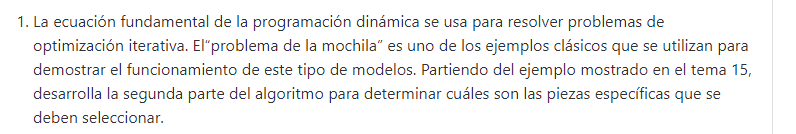

[Encale donde explican cada linea de codigo](https://www.askpython.com/python/examples/knapsack-problem-dynamic-programming)

[Video de explicacion](https://www.youtube.com/watch?v=fJWq8ZIV420&ab_channel=CodingPerspective)

In [1]:
import numpy as np

In [2]:
#parametro v: valores de los items
#parametro w: pesos de los items
#parametro C: capacidad de la mochila

v = [500, 250, 1500, 1200, 1200, 1000, 800, 950]
w = [4,3,10,12,9,5,6,7]
C = 50


In [8]:
def opt_knapsack (v,w,C):
  N = len(v)
  print("Variable N",N)
  m = {}

  for c in range(C+1):
    m[(0,c)] = 0
  #M es un diccionario y su key es una tupla 
  print("Variable M inicial",m)
  #Hace un for rango 8, del 1 al 8 son los valores que recorre i 
  for i in range(1, N+1):
    # print("i es en el for",i)
    for c in range(C+1):
      #Hace un for rango 51, del 0 al 50 son los valores que recorre i 
      # print("C es en el for",c)
      # print("Valor de W",w[i-1])
      if w[i-1]<= c:
        # print("Max",max(m[i-1,c], v[i-1] + m[(i-1,c-w[i-1])]))
        # print("m is ",(m[i-1,c]))
        # print("Valor es", v[i-1])
        # print(c-w[i-1])
        m[(i,c)] = max(m[i-1,c], v[i-1] + m[(i-1,c-w[i-1])])
      else:
        m[(i,c)] = m[(i-1,c)]
        # print("Posicion de m",m[(i,c)])

  #Tiene un error
  # elements = []
  # x = C
  # for i in range(N, 0, -1):
  #   # print("Valor de i inversa",i)
  #   # print("Valor de de m", m[i, x])
  #   # print("Valor de de w", w[i - 1])
  #   # print("Valor de resta",  m[i, x] - m[i - 1, c - w[i - 1]])
  #   if m[i, x] - m[i - 1, c - w[i - 1]] == v[i - 1]:
  #       elements.append(i)
  #       # print(x)
  #       x -= w[i - 1]
  # # print("Variable M final",m)
  # print("elemnts",elements)
  y = C
  suma = 0
  for i in range(N, 0, -1):
    if m[(i,y)] != m[(i-1,y)]:
      print(f'posicion {i} con un valor {v[i-1]} y un peso {w[i-1]}')
      suma +=v[i-1]
      y -= w[i-1]
  print("valor total",suma)
  return m[(N,C)]

In [9]:
opt_knapsack (v,w,C)

Variable N 8
Variable M inicial {(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0, (0, 7): 0, (0, 8): 0, (0, 9): 0, (0, 10): 0, (0, 11): 0, (0, 12): 0, (0, 13): 0, (0, 14): 0, (0, 15): 0, (0, 16): 0, (0, 17): 0, (0, 18): 0, (0, 19): 0, (0, 20): 0, (0, 21): 0, (0, 22): 0, (0, 23): 0, (0, 24): 0, (0, 25): 0, (0, 26): 0, (0, 27): 0, (0, 28): 0, (0, 29): 0, (0, 30): 0, (0, 31): 0, (0, 32): 0, (0, 33): 0, (0, 34): 0, (0, 35): 0, (0, 36): 0, (0, 37): 0, (0, 38): 0, (0, 39): 0, (0, 40): 0, (0, 41): 0, (0, 42): 0, (0, 43): 0, (0, 44): 0, (0, 45): 0, (0, 46): 0, (0, 47): 0, (0, 48): 0, (0, 49): 0, (0, 50): 0}
posicion 8 con un valor 950 y un peso 7
posicion 7 con un valor 800 y un peso 6
posicion 6 con un valor 1000 y un peso 5
posicion 5 con un valor 1200 y un peso 9
posicion 4 con un valor 1200 y un peso 12
posicion 3 con un valor 1500 y un peso 10
valor total 6650


6650

#Punto 4
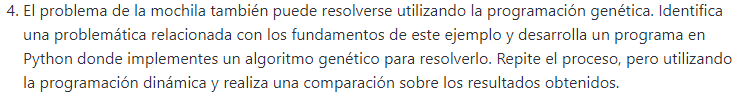

Algortimo de programcion genetica

In [5]:
# Python3 program to create target string, starting from
# random string using Genetic Algorithm

import random

# Number of individuals in each generation
POPULATION_SIZE = 100

# Valid genes
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = "I love GeeksforGeeks"

class Individual(object):
	'''
	Class representing individual in population
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		create random genes for mutation
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''

		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fitness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#current generation
	generation = 1

	found = False
	population = []

	# create initial population
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# sort the population in increasing order of fitness score
		population = sorted(population, key = lambda x:x.fitness)

		# if the individual having lowest fitness score ie.
		# 0 then we know that we have reached to the target
		# and break the loop
		if population[0].fitness <= 0:
			found = True
			break

		# Otherwise generate new offsprings for new generation
		new_generation = []

		# Perform Elitism, that mean 10% of fittest population
		# goes to the next generation
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# From 50% of fittest population, Individuals
		# will mate to produce offspring
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.mate(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".\
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1

	
	print("Generation: {}\tString: {}\tFitness: {}".\
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()



Generation: 1	String: (il4[d 7B
KODMc@}e
l	Fitness: 17
Generation: 2	String: $il4vd p93KOM"6@}e]l	Fitness: 16
Generation: 3	String: $il4vd p93KOM"6@}e]l	Fitness: 16
Generation: 4	String: $il4vd p93KOM"6@}e]l	Fitness: 16
Generation: 5	String: 7!lov45p9/FOMo2G}mdG	Fitness: 15
Generation: 6	String: vZldv( Fk
x"fMr@}ep}	Fitness: 14
Generation: 7	String: vZldv( Fk
x"fMr@}ep}	Fitness: 14
Generation: 8	String: _Plovd pZ/iD%McGeeIs	Fitness: 12
Generation: 9	String: _Plovd pZ/iD%McGeeIs	Fitness: 12
Generation: 10	String: _Plovd pZ/iD%McGeeIs	Fitness: 12
Generation: 11	String: _Plov% p,eJ9fxrGIeYs	Fitness: 10
Generation: 12	String: _Plov% p,eJ9fxrGIeYs	Fitness: 10
Generation: 13	String: xPlovd }e8B9forGxe]s	Fitness: 9
Generation: 14	String: xPlovd }e8B9forGxe]s	Fitness: 9
Generation: 15	String: xPlovd }e8B9forGxe]s	Fitness: 9
Generation: 16	String: xPlovd }e8B9forGxe]s	Fitness: 9
Generation: 17	String: I lov% p(eT9fxrGIees	Fitness: 8
Generation: 18	String: I lov% p(eT9fxrGIees	Fitness: 8
Generat

Programacion dinamica

Construir una cadena de destino a partir de una lista de subcadenas

In [6]:
def match_string(string, target, index):
    lens = len(string)
    lent = len(target)
    
    if(index + lens > lent):
        return False
    
    for i in range(index,index+lens):
        if(string[i-index] != target[i]):
            return False
    
    if(target[index+lens] == " " or target[index+lens] == "."):
        return True
    else:
        return False

    
def solve(arr,target,index,dp):
    
    n = len(arr)
    ln = len(target)
    
    if(index == ln):
        return True
    elif(index > ln):
        return False
    
    if(dp[index] != None):
        return dp[index]
    
    result = False
    for em in arr:
        if(match_string(em,target,index)):
          # RECROSUVIDAD
            result = result or solve(arr,target,index+len(em)+1,dp)
    dp[index] = result
    return dp[index]
    

target = "The brown fox is cool."
arr    = ["The brown fox", "The", "brown", "is cool"]
dp = [None for i in range(len(target))]
answer = solve(arr,target,0,dp)
print(answer)

True


Utilizando programacion normal 

In [8]:
# Python program to generate and match 
# the string from all random strings
# of same length
  
# Importing string, random
# and time modules
import string
import random
import time
  
# all possible characters including 
# lowercase, uppercase and special symbols
possibleCharacters = string.ascii_lowercase + string.digits + string.ascii_uppercase + ' ., !?;:'
  
# string to be generated
t = "geek"
  
# To take input from user
# t = input(str("Enter your target text: "))
  
attemptThis = ''.join(random.choice(possibleCharacters)
                                for i in range(len(t)))
attemptNext = ''
  
completed = False
iteration = 0
  
# Iterate while completed is false
while completed == False:
    print(attemptThis)
      
    attemptNext = ''
    completed = True
      
    # Fix the index if matches with 
    # the strings to be generated
    for i in range(len(t)):
        if attemptThis[i] != t[i]:
            completed = False
            attemptNext += random.choice(possibleCharacters)
        else:
            attemptNext += t[i]
              
    # increment the iteration 
    iteration += 1
    attemptThis = attemptNext
    time.sleep(0.1)
  
# Driver Code
print("Target matched after " +
      str(iteration) + " iterations")

 zvM
Ioud
mAzL
Pmo2
C9PF
m!rZ
g3BK
glvX
gpXc
gNkc
gb:M
gAp,
gv5C
geoQ
gerc
gekw
ge5m
ge3z
gexj
geT4
ge;v
geUZ
geWw
geO;
getC
gejX
ge0 
geIm
geXo
ge I
geuU
genP
geyc
gesr
ge92
gesq
ge3 
geQK
gexs
geZ1
geEY
geHl
geQ:
geI1
ge3!
ge5e
geP3
ge7e
geei
geeU
gee8
geer
gee0
geea
geeh
geet
geel
gee 
gee:
geeB
geeA
geeQ
geed
geeV
geep
geeV
gee4
geeB
gee.
gee6
gee8
gee;
geeN
geeP
geeB
geec
geeX
geeh
geeO
geeO
geek
Target matched after 81 iterations


**Ahunque podemos ver que no son el mismo ejemplo son demasiado similares entre si, lo que podemos concluir que el los algoritmos evolutivos son muchos mas rapidos pero tiende a ser mas complicados de leerlos en cambio los dinamicos tiene a ser mas sencillos de leer pero un poco mas lentos**


Programación dinámica (DP):

Algoritmo exacto - Encuentra una solución óptima global

* Larga duración
* Utiliza mucha memoria
* Muy sencillo de implementar

Algoritmo genético (GA):
* Estimación - No necesariamente encuentra la solución óptima global
* Corto tiempo de ejecución
El uso de la memoria depende del número de individuos, pero generalmente es manejable
* La calidad de la solución depende de elegir una representación eficiente + dejar que se ejecute el tiempo suficiente
* Razonablemente simple de implementar, las decisiones de diseño pueden ser un poco más complejas, especialmente si no tiene experiencia significativa con las AG.









1.   Algoritmo Genitico
2.   Algoritmo Evolutivo 
3.   Programcion evolutiva

[Expliacion de cada uno de los puntos](https://stackoverflow.com/questions/2890061/what-is-the-difference-between-genetic-and-evolutionary-algorithms)

